# Project: Prosper Loan Data analysis




## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

#### A number of characteristics about Prosper loans in each raw:
<ul>
    <li>LoanStatus:	The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted,
        FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket. 
    <li>BorrowerAPR:	The Borrower's Annual Percentage Rate (APR) for the loan.
    <li>BorrowerRate:	The Borrower's interest rate for this loan. 
    <li>LenderYield:	The Lender yield on the loan. Lender yield is equal to the interest rate on the loan less the servicing fee.
    <li>EstimatedEffectiveYield:	Effective yield is equal to the borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated uncollected interest on charge-offs, (iii) plus estimated collected late fees.  Applicable for loans originated after July 2009.




 <ul><li>ProsperRating (Alpha):	The Prosper Rating assigned at the time the listing was created between AA - HR.  Applicable for loans originated after July 2009.
    <li>ProsperScore:	A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
    <li>ListingCategory:	The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

 <ul><li>EmploymentStatus:	The employment status of the borrower at the time they posted the listing.
    <li>CurrentCreditLines:	Number of current credit lines at the time the credit profile was pulled.
    <li>DebtToIncomeRatio:	The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
<li>IncomeRange:	The income range of the borrower at the time the listing was created.
    <li>IncomeVerifiable:	The borrower indicated they have the required documentation to support their income.
    <li>TotalProsperLoans:	Number of Prosper loans the borrower at the time they created this listing. This value will be null if the borrower had no prior loans. 
    <li>LoanOriginalAmount:	The origination amount of the loan.
    <li>MonthlyLoanPayment:	The scheduled monthly loan payment.
    <li>Recommendations:	Number of recommendations the borrower had at the time the listing was created.
</ul>

#### The follwoing questions are required here to investigate this dataset:
><ul>
        <li> What factors are important for us to predict if a loan will be completed or ?.</li>
</ul>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## 2. wrangling

In [65]:
df = pd.read_csv('prosperLoanData.csv')

In [66]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

` Now we will combine 'ProsperRating (Alpha)' and 'CreditGrade' they are borrower rating after 2009  and before respectively`

In [67]:
df['ProsperRating (Alpha)'].isnull().sum()

29084

In [68]:
df['ProsperRating (Alpha)'] .unique(), df['CreditGrade'] .unique()

(array([nan, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object),
 array(['C', nan, 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'], dtype=object))

In [69]:
df[['ProsperRating (Alpha)','CreditGrade']].head()

,ProsperRating (Alpha),CreditGrade
0,NaN,C
1,A,NaN
2,NaN,HR
3,A,NaN
4,D,NaN


In [70]:
# combining both columns in 'ProsperRating (Alpha)'
for x in df[df['ListingCreationDate'] < '2009']['ProsperRating (Alpha)'].index:
    df['ProsperRating (Alpha)'][x] = df['CreditGrade'][x]


<ipython-input-70-ec048d93bc14>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ProsperRating (Alpha)'][x] = df['CreditGrade'][x]


`No of listings not having rating:`

In [71]:
df['ProsperRating (Alpha)'].isnull().sum()

144

In [171]:
df = df.dropna(subset = ['ProsperRating (Alpha)','LoanStatus'])

`We will focus on features of borrowers that will affect "Loan Status" for Prosper to know what are the factors that most affect loans to be completed.`
1. LoanStatus
2. BorrowerAPR
3. BorrowerRate
4. LenderYield
5. EstimatedEffectiveYield
6. ProsperRating (Alpha)
7. ProsperScore
8. ListingCategory (numeric)
9. EmploymentStatus
10. CurrentCreditLines
11. DebtToIncomeRatio
12. IncomeRange
13. IncomeVerifiable
14. LoanOriginalAmount
15. MonthlyLoanPayment
16. Recommendations
17. TotalProsperLoans

In [73]:
df = df[['LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','EstimatedEffectiveYield','ProsperRating (Alpha)',\
   'ProsperScore','ListingCategory (numeric)','EmploymentStatus','CurrentCreditLines','DebtToIncomeRatio','IncomeRange',\
   'IncomeVerifiable','LoanOriginalAmount','MonthlyLoanPayment','Recommendations','TotalProsperLoans']]

In [74]:
df = df.reindex()

In [14]:
# Removing NAN raws in BorrowerAPR column
df = df.dropna(subset=['BorrowerAPR'])

In [15]:
# Replacing N/A raws with not available.
df['EmploymentStatus'].fillna(value='NotAvailable', inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113793 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113793 non-null  object 
 1   BorrowerAPR                113768 non-null  float64
 2   BorrowerRate               113793 non-null  float64
 3   LenderYield                113793 non-null  float64
 4   EstimatedEffectiveYield    84853 non-null   float64
 5   ProsperRating (Alpha)      113793 non-null  object 
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  113793 non-null  int64  
 8   EmploymentStatus           111538 non-null  object 
 9   CurrentCreditLines         106189 non-null  float64
 10  DebtToIncomeRatio          105250 non-null  float64
 11  IncomeRange                113793 non-null  object 
 12  IncomeVerifiable           113793 non-null  bool   
 13  LoanOriginalAmount         11

In [16]:
df.describe()

,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,ProsperScore,ListingCategory (numeric),CurrentCreditLines,DebtToIncomeRatio,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,TotalProsperLoans
count,113912.000000,113912.000000,113912.000000,84853.000000,84853.000000,113912.000000,106333.000000,105358.000000,113912.000000,113912.000000,113912.000000,22085.000000
mean,0.218828,0.192786,0.182723,0.168661,5.950067,2.774817,10.317192,0.275993,8338.015661,272.511490,0.048037,1.421100
std,0.080364,0.074809,0.074506,0.068467,2.376501,3.997024,5.457866,0.551814,6245.940592,192.697031,0.332389,0.764042
min,0.006530,0.000000,-0.010000,-0.182700,1.000000,0.000000,0.000000,0.000000,1000.000000,0.000000,0.000000,0.000000
25%,0.156290,0.134000,0.124500,0.115670,4.000000,1.000000,7.000000,0.140000,4000.000000,131.685000,0.000000,1.000000
50%,0.209760,0.184000,0.173000,0.161500,6.000000,1.000000,10.000000,0.220000,6500.000000,217.740000,0.000000,1.000000
75%,0.283810,0.250000,0.240000,0.224300,8.000000,3.000000,13.000000,0.320000,12000.000000,371.580000,0.000000,2.000000
max,0.512290,0.497500,0.492500,0.319900,11.000000,20.000000,59.000000,10.010000,35000.000000,2251.510000,39.000000,8.000000


In [17]:
# For simpilcity, we will convert (True, and False ) to be (1,0) respectively. 
df['IncomeVerifiable'] = df['IncomeVerifiable'].apply(lambda x : 1 if x == True else 0);

In [18]:
df['IncomeVerifiable'].unique()

array([1, 0], dtype=int64)

<a id='eda'></a>
## 3. Exploratory Data Analysis

- #### We will split our data to completed loans and defaulted loans to be investigate other features.

In [19]:
df_completed = df[df['LoanStatus'] == 'Completed']
df_defaulted = df[df['LoanStatus'] == 'Defaulted']

-  Getting a wide look for all effective features:

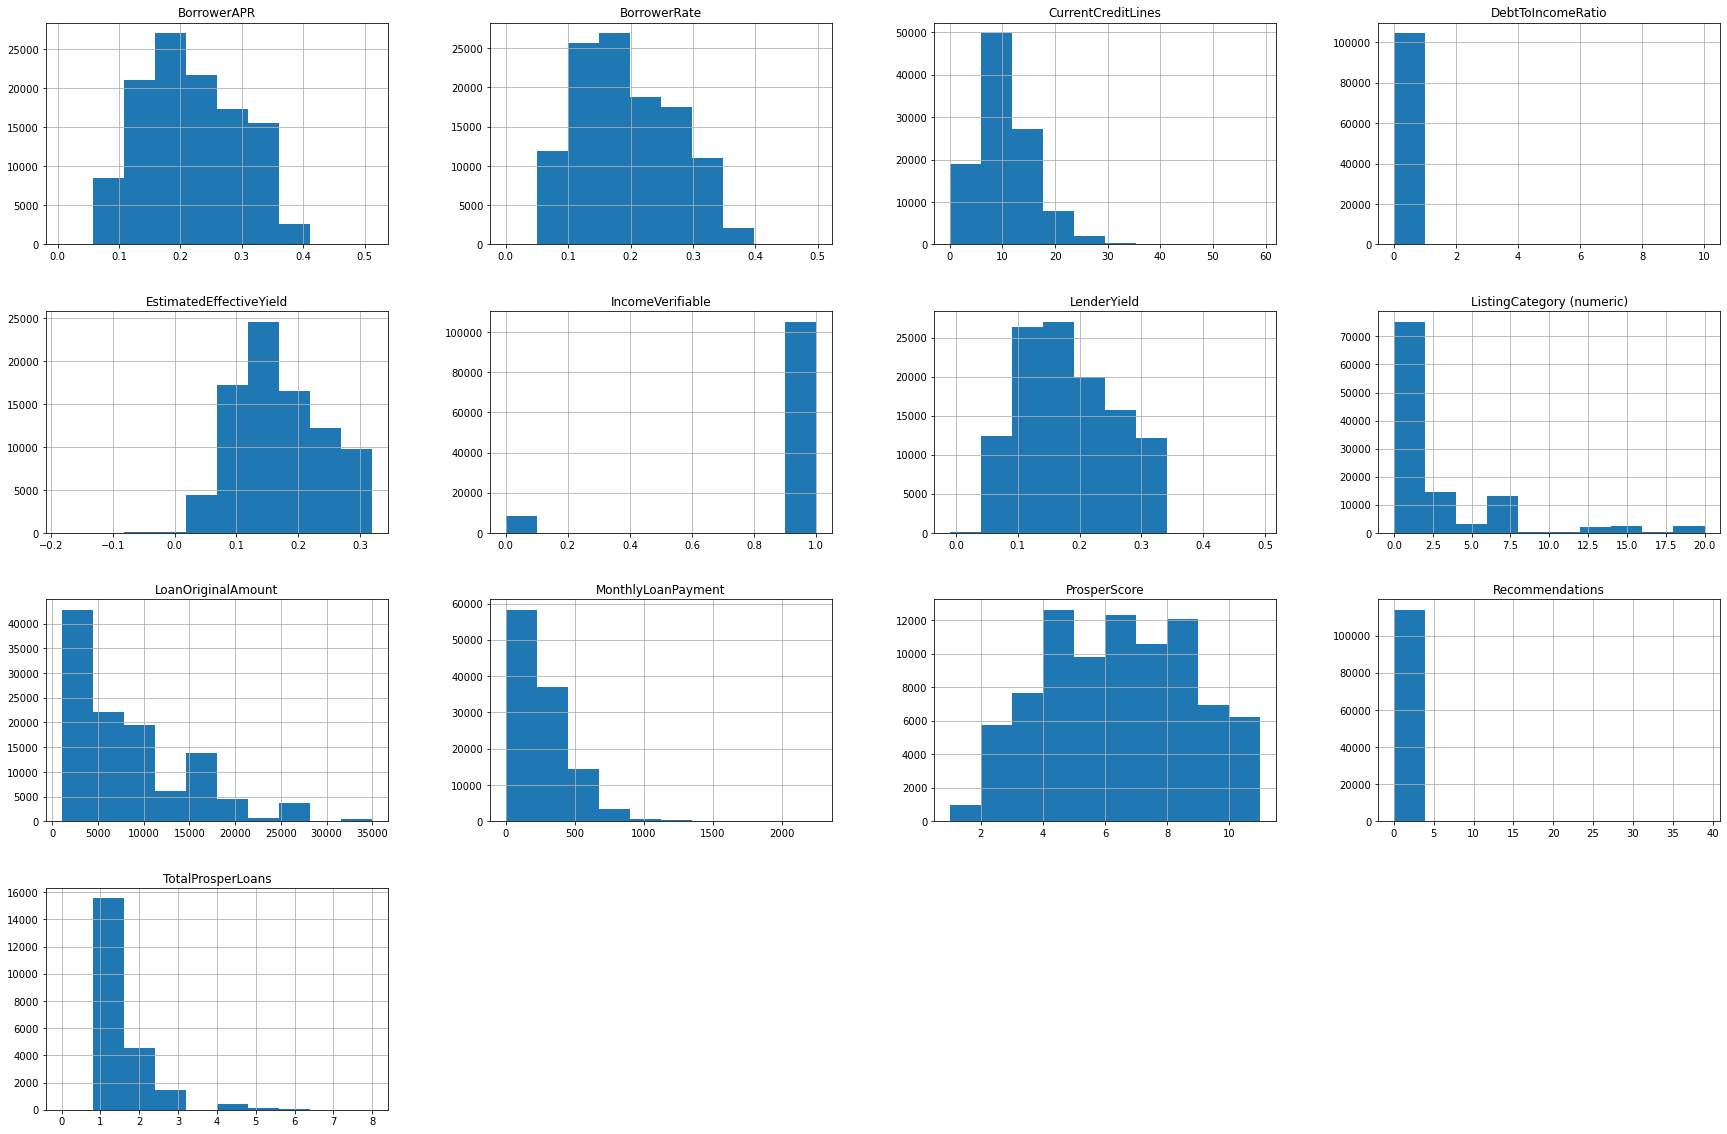

In [20]:
df.hist(figsize =(30,20));

...

-  For all Loan status we want to see what is the percentage per each category`

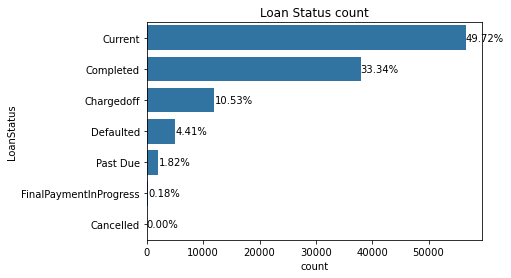

In [224]:
sb.countplot(data=df , y = 'LoanStatus',order = df.LoanStatus.value_counts(ascending =False).index,color = sb.color_palette()[0]);
x=0
for i in  df.LoanStatus.value_counts(ascending=False).index:
    perc = '{:0.2f}%'.format(df.LoanStatus.value_counts(normalize=True,ascending =True)[i]*100)
    plt.text(((df.LoanStatus.value_counts(normalize=True,ascending =False)[i]*len(df.LoanStatus))+2),x,perc,va='center')
    x+=1
plt.title('Loan Status count');

`To simplify we will consider all past due under one category since they are close`

In [76]:
def past_change(i) :
    if "Past Due" in i:
        return 'Past Due'
    else:
        return i
df['LoanStatus'] = df['LoanStatus'].apply(past_change)

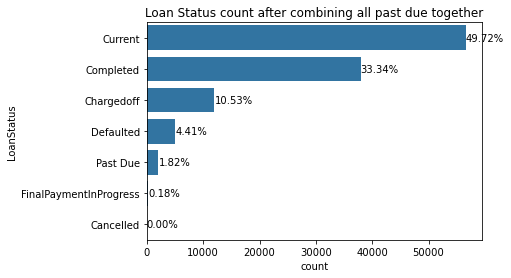

In [225]:
sb.countplot(data=df , y = 'LoanStatus',order = df.LoanStatus.value_counts(ascending =False).index,color = sb.color_palette()[0]);
x=0
for i in  df.LoanStatus.value_counts(ascending=False).index:
    perc = '{:0.2f}%'.format(df.LoanStatus.value_counts(normalize=True,ascending =True)[i]*100)
    plt.text(((df.LoanStatus.value_counts(normalize=True,ascending =False)[i]*len(df.LoanStatus))+2),x,perc,va='center')
    x+=1
plt.title('Loan Status count after combining all past due together');

-  Encoding Loan status numerically as the following:

In [26]:
df['LoanStatus'].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

In [77]:
Loan_dict = {'Completed' : 1 , 'FinalPaymentInProgress' : 2 , 'Current' : 3, 'Cancelled': 4, 
             'Chargedoff' : 5, 'Past Due' : 6, 'Defaulted' : 7 }
df['LoanStatusNumeric'] = df['LoanStatus'].map(Loan_dict)

In [78]:
df['LoanStatusNumeric'].unique()


array([1, 3, 6, 7, 5, 4, 2], dtype=int64)

-  Count of each ProsperRating (Alpha):

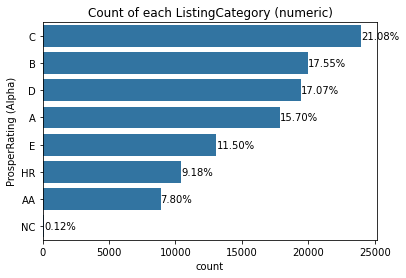

In [226]:
sb.countplot(data=df , y = 'ProsperRating (Alpha)',order = df['ProsperRating (Alpha)'].value_counts(ascending =False).index,color = sb.color_palette()[0]);

x=0
for i in  df['ProsperRating (Alpha)'].value_counts(ascending=False).index:
    perc = '{:0.2f}%'.format(df['ProsperRating (Alpha)'].value_counts(normalize=True,ascending =True)[i]*100)
    plt.text(((df['ProsperRating (Alpha)'].value_counts(normalize=True,ascending =False)[i]*len(df.dropna(subset=['ProsperRating (Alpha)']))) +1),x,perc,va='center')
    x+=1
plt.title('Count of each ListingCategory (numeric)');

 We can notice that "HR" category is the greater one to cancel loan.

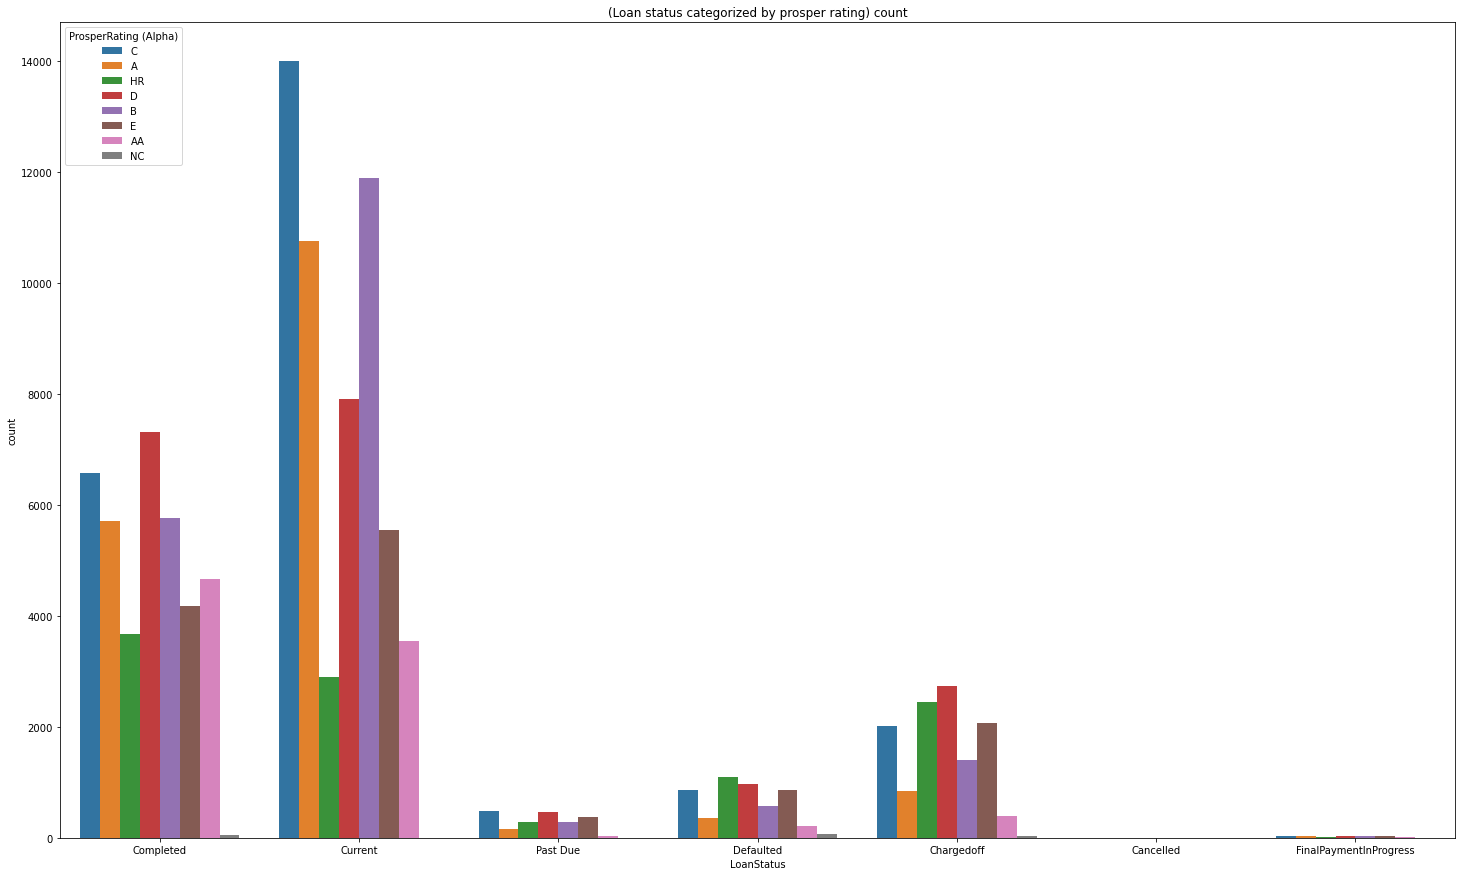

In [228]:
plt.figure(figsize = (25,15));
sb.countplot(data = df ,x='LoanStatus',hue='ProsperRating (Alpha)');
plt.title('(Loan status categorized by prosper rating) count');

 This chart is detailed below:

-  Prosper rating for completed loans:

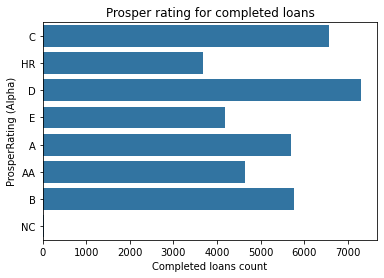

In [229]:
sb.countplot(data = df_completed ,y='ProsperRating (Alpha)',color = sb.color_palette()[0]);
plt.xlabel('Completed loans count');
plt.title('Prosper rating for completed loans');

 `D` category is the most probable to complete loan

-  Prosper rating for defaulted loans:

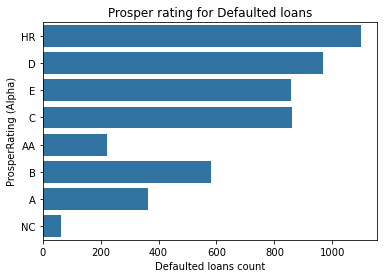

In [230]:
sb.countplot(data = df_defaulted ,y='ProsperRating (Alpha)',color = sb.color_palette()[0]);
plt.xlabel('Defaulted loans count');
plt.title('Prosper rating for Defaulted loans');

 A little observation that "AA", and "NC" categoris are less in defaulted loans.

-  Effect of EmploymentStatus on Loan Status

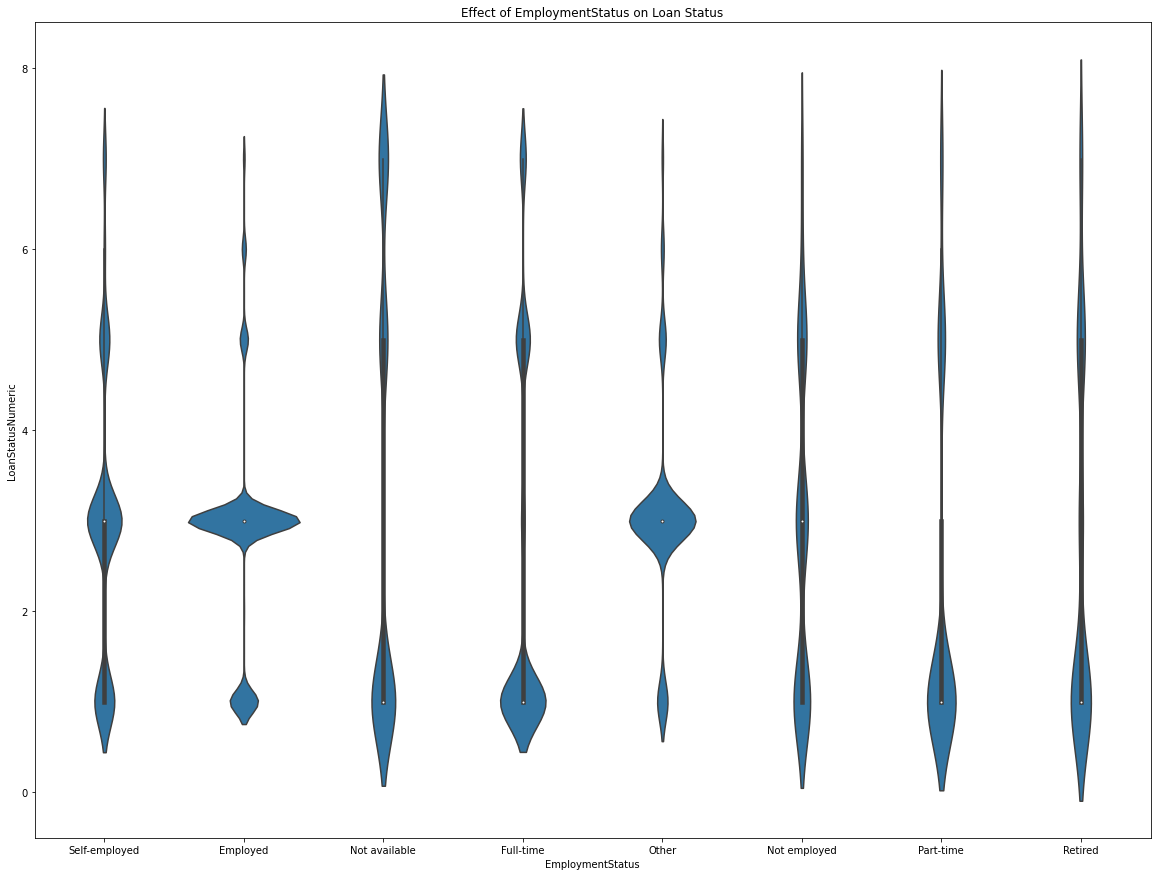

In [231]:
fig = plt.figure(figsize = (20,15));
ax = fig.add_subplot(111) 
sb.violinplot(data = df, x='EmploymentStatus', y='LoanStatusNumeric',color = sb.color_palette()[0]);
plt.title('Effect of EmploymentStatus on Loan Status');

 For category (1) completed, Full time is the largest factor for loan completion 

-  LenderYield effect on loan status

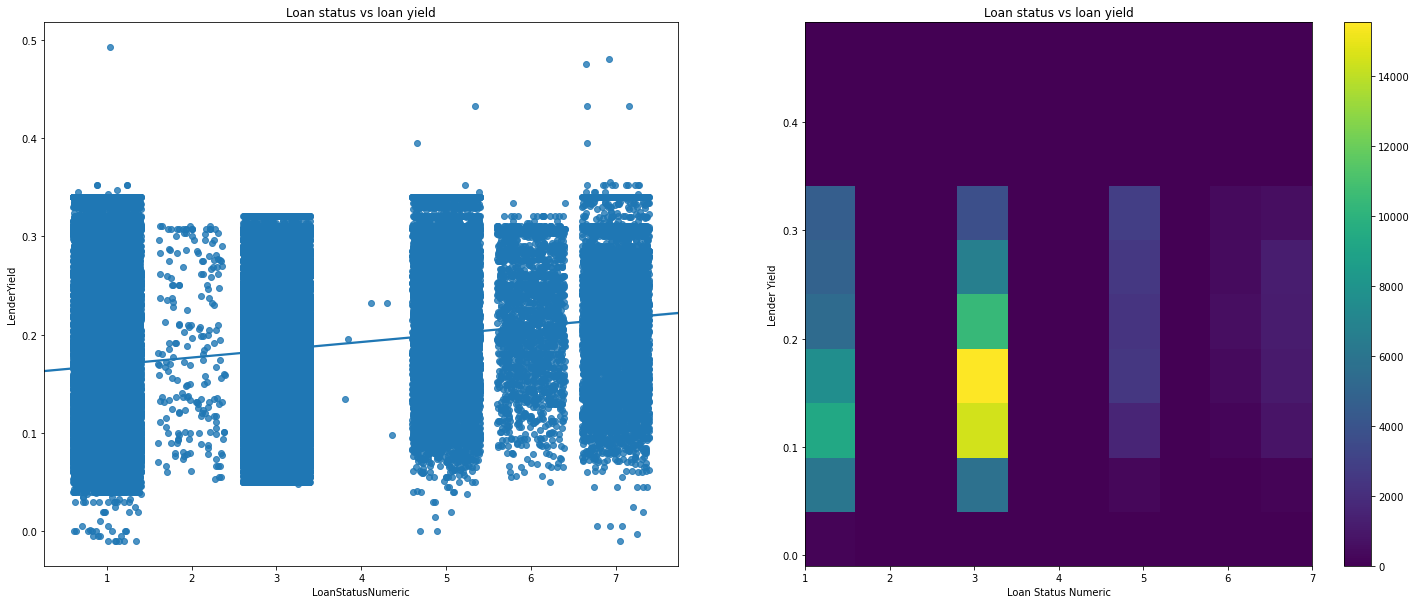

In [233]:
plt.figure(figsize=(25,10))
plt.subplot(1, 2, 1)
sb.regplot(data = df, x = 'LoanStatusNumeric', y = 'LenderYield',truncate=False, x_jitter=0.4);
plt.title('Loan status vs loan yield');

plt.subplot(1, 2, 2)
plt.hist2d(data = df , x = 'LoanStatusNumeric', y = 'LenderYield');
plt.colorbar();
plt.xlabel('Loan Status Numeric');
plt.ylabel('Lender Yield');
plt.title('Loan status vs loan yield');

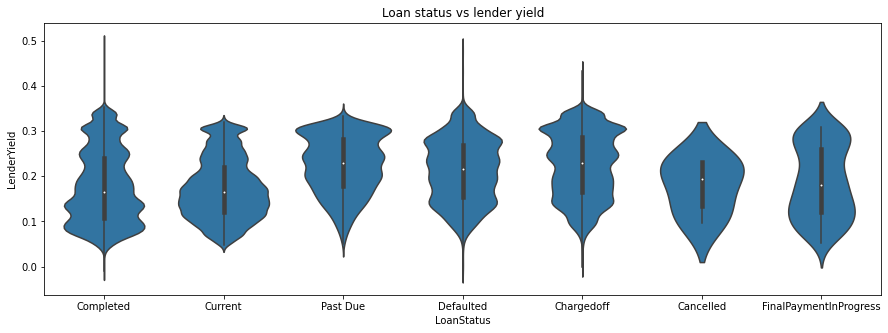

In [234]:
plt.figure(figsize = (15, 5));
sb.violinplot(data = df, x='LoanStatus', y='LenderYield',color = sb.color_palette()[0]);
plt.title('Loan status vs lender yield');

A slight notice here that deafaulted loans tend to have higher lender yield, or by other words for low lender yield it is better predicted for the loan to be completed

-  BorrowerAPR effect on loan status

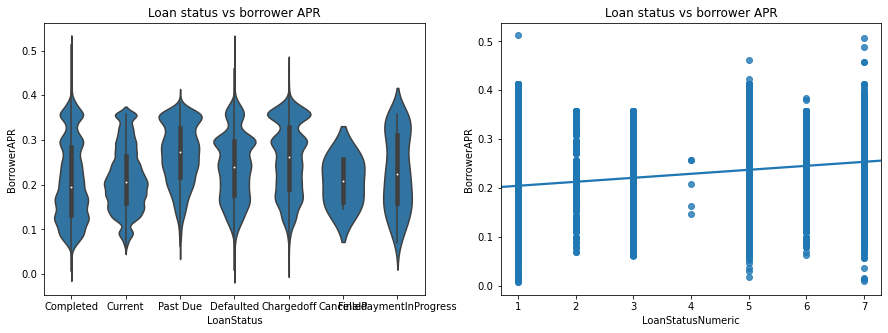

In [235]:
plt.figure(figsize = (15, 5));
plt.subplot(1, 2, 1)
sb.violinplot(data = df, x='LoanStatus', y='BorrowerAPR',color = sb.color_palette()[0]);
plt.title('Loan status vs borrower APR');

plt.subplot(1, 2, 2)
sb.regplot(data = df, x = 'LoanStatusNumeric', y = 'BorrowerAPR',truncate=False, );
plt.title('Loan status vs borrower APR');


#### Here we can optain few observations:
1. Most of Borrower APR values is between 0 - 0.2 in completed loans
2. For cancelled loans most of  borrower APR values is between 0.1 - 0.3
>i.e. we think the lower the APR the bigger te chance to complete Loan

-  Effect of ListingCategory (numeric) on loan status

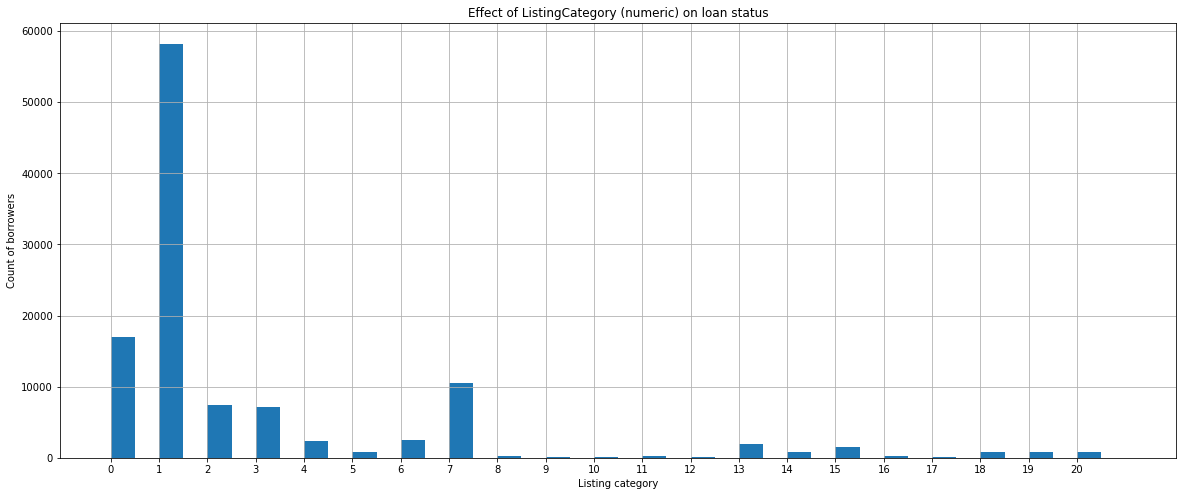

In [236]:
bins = np.arange(0,df['ListingCategory (numeric)'].max()+1.5,0.5)
df['ListingCategory (numeric)'].hist(bins = bins,figsize = (20,8),rwidth =1)
plt.xticks(np.arange(0,df['ListingCategory (numeric)'].max()+1,1));
plt.ylabel('Count of borrowers');
plt.xlabel('Listing category');
plt.title('Effect of ListingCategory (numeric) on loan status');

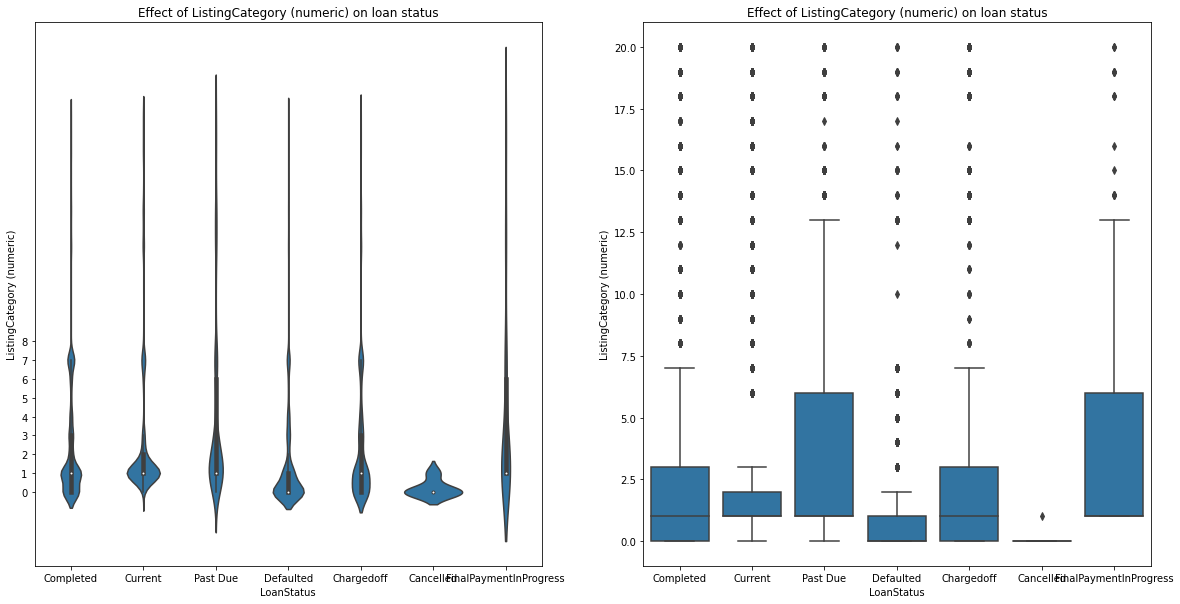

In [237]:
plt.figure(figsize = (20,10));
plt.subplot(1,2,1);
sb.violinplot(data = df, x='LoanStatus', y='ListingCategory (numeric)',color = sb.color_palette()[0]);
plt.yticks([0,1,2,3,4,5,6,7,8,]);
plt.title('Effect of ListingCategory (numeric) on loan status');

plt.subplot(1,2,2);
sb.boxplot(data=df, x='LoanStatus', y='ListingCategory (numeric)',color = sb.color_palette()[0]);
plt.title('Effect of ListingCategory (numeric) on loan status');

 Defaulted loans are concentrated in the first two categories(NotAvailable, Debt consolidation)

- where 1 = `Debt Consolidation`  and  7 = `other`
- so `Debt Consolidation` is the most listed loan category to be completed

-  We will devide DF to have a wider look at either completed and defaulted loans count:

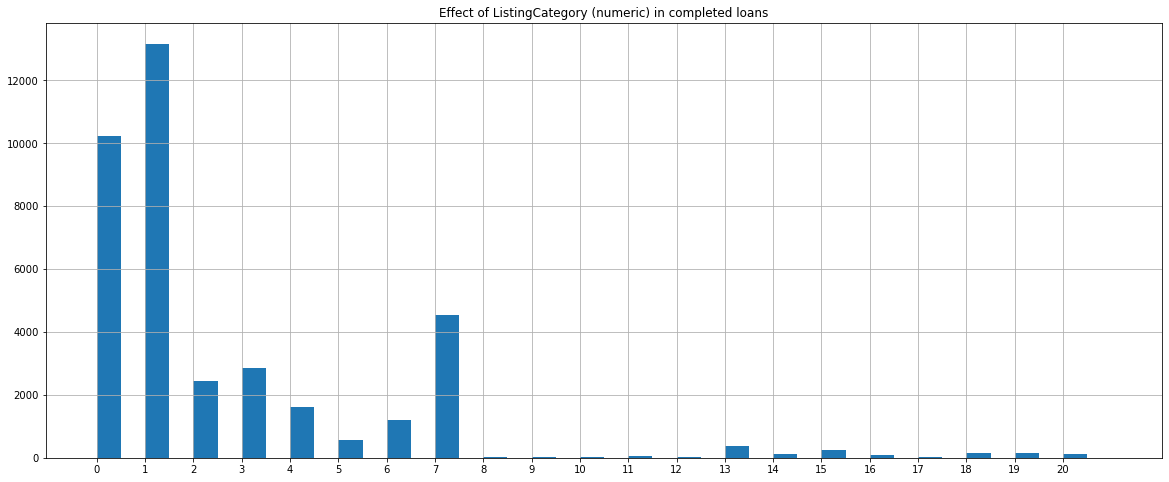

In [238]:
# Completed
bins = np.arange(0,df_completed['ListingCategory (numeric)'].max()+1.5,0.5)
df_completed['ListingCategory (numeric)'].hist(bins = bins,figsize = (20,8),rwidth =1)
plt.xticks(np.arange(0,df_completed['ListingCategory (numeric)'].max()+1,1));
plt.title('Effect of ListingCategory (numeric) in completed loans');

 Category `1 (Debt Consolidation)` tend to have big role in loan completion

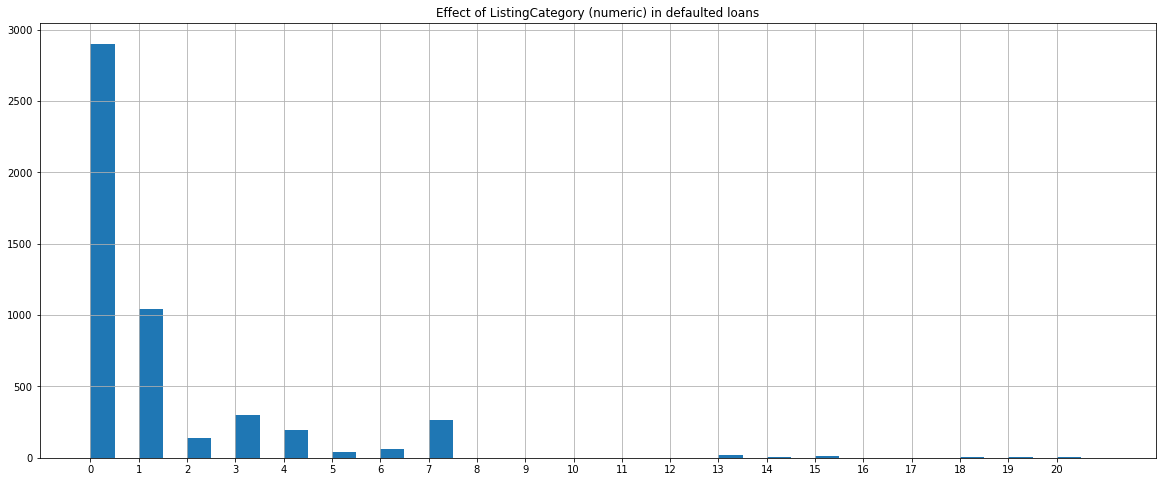

In [239]:
# Defaulted
bins = np.arange(0,df_defaulted['ListingCategory (numeric)'].max()+1.5,0.5)
df_defaulted['ListingCategory (numeric)'].hist(bins = bins,figsize = (20,8),rwidth =1)
plt.xticks(np.arange(0,df_defaulted['ListingCategory (numeric)'].max()+1,1));
plt.title('Effect of ListingCategory (numeric) in defaulted loans');

 For those who were defaulted the largest count has no cateogry available which needs more investigation from propser.

-  Investigating MonthlyLoanPayment against Loan Status

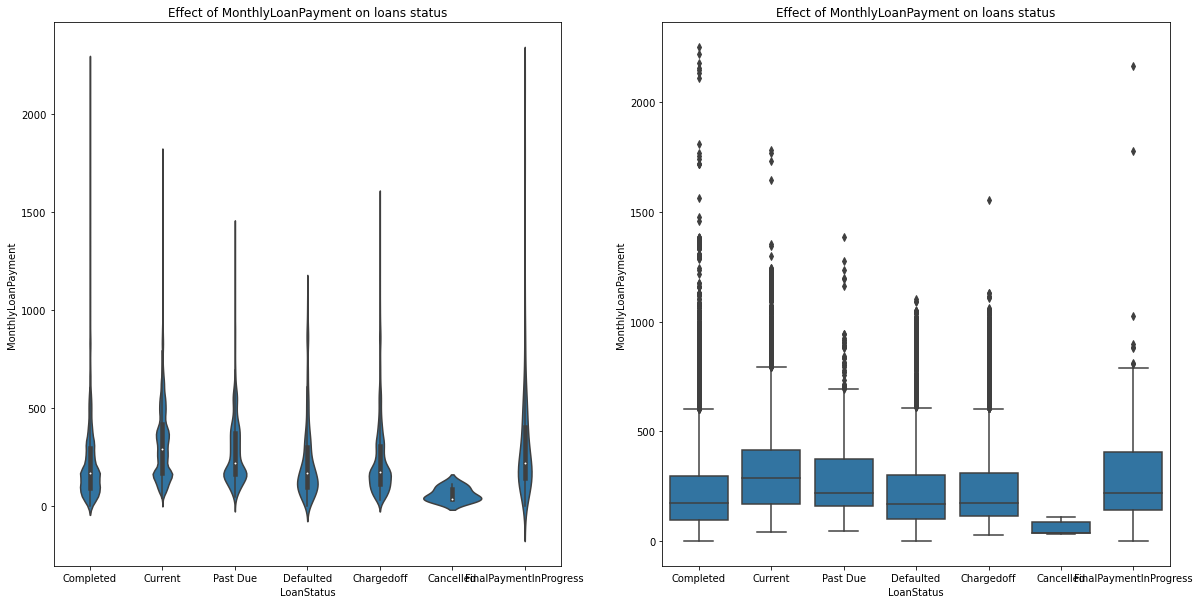

In [240]:
plt.figure(figsize = (20,10));
plt.subplot(1,2,1);
sb.violinplot(data = df, x='LoanStatus', y='MonthlyLoanPayment',color = sb.color_palette()[0]);
plt.title('Effect of MonthlyLoanPayment on loans status');

plt.subplot(1,2,2);
sb.boxplot(data=df, x='LoanStatus', y='MonthlyLoanPayment',color = sb.color_palette()[0]);
plt.title('Effect of MonthlyLoanPayment on loans status');

 In the second plot we can see that past due  category has higer Monthly loan Payment than completed loans, also cancelled ones have lower than completed.

-  Investigating Recommendations against Loan Status

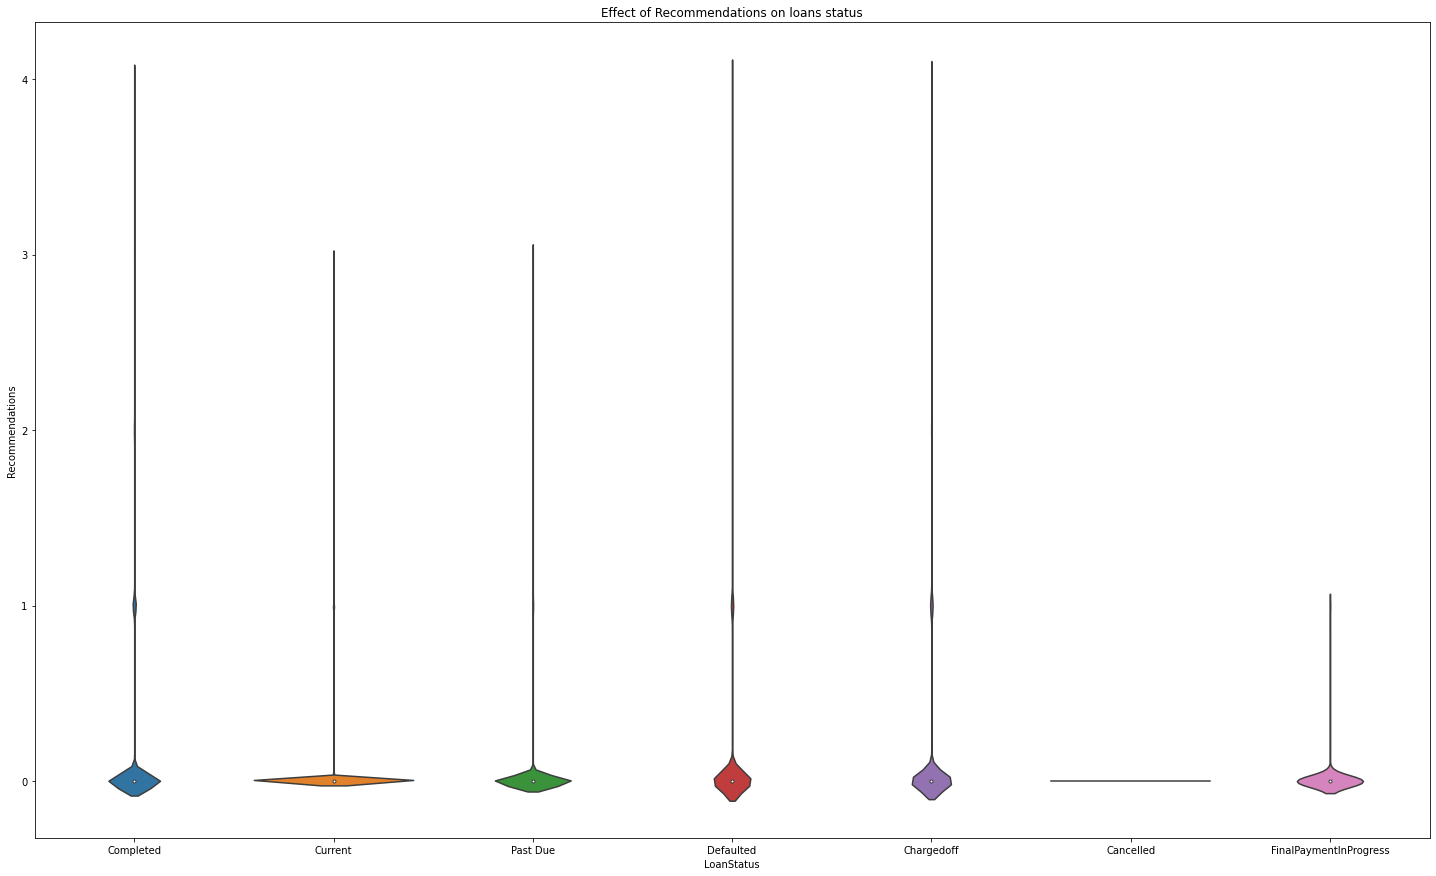

In [241]:
plt.figure(figsize = (25,15));
sb.violinplot(data = df[df['Recommendations']< 5] ,x='LoanStatus',y='Recommendations');
plt.title('Effect of Recommendations on loans status');

 Recommendation didn't make a difference

-  Investigating TotalProsperLoans against Loan Status

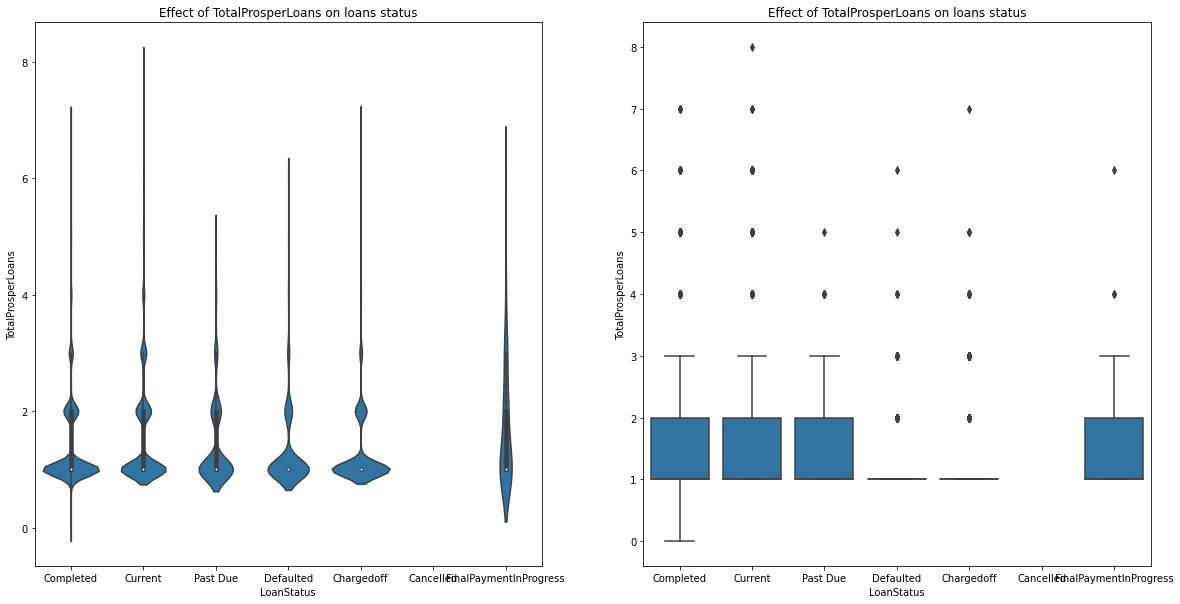

In [242]:
plt.figure(figsize = (20,10));
plt.subplot(1,2,1);
sb.violinplot(data = df, x='LoanStatus', y='TotalProsperLoans',color = sb.color_palette()[0]);
plt.title('Effect of TotalProsperLoans on loans status');

plt.subplot(1,2,2);
sb.boxplot(data=df, x='LoanStatus', y='TotalProsperLoans',color = sb.color_palette()[0]);
plt.title('Effect of TotalProsperLoans on loans status');

 No of Loans didn't make any difference either

<a id='conclusions'></a>
# Conclusions
###  What factors are important for us to predict if loan will be completed or not?.
### Results:
><li>We can notice that "HR" category is the greater one to cancel loan
><li>D category is the most probable to complete loan
><li>For category (1) completed, Full time is the largest factor for loan completion
><li>A slight notice here that deafaulted loans tend to have higher lender yield, 
or by other words for low lender yield it is better predicted for the loan to be completed
><li>Most of Borrower APR values is between 0 - 0.2 in completed loans



><li>For cancelled loans most of borrower APR values is between 0.1 - 0.3
i.e. we think the lower the APR the bigger te chance to complete Loan
><li>Defaulted loans are concentrated in the first two categories(NotAvailable, Debt consolidation)
where 1 = Debt Consolidation and 7 = other
so Debt Consolidation is the most listed loan category to be completed
><li>For those who were defaulted the largest count has no cateogry available which needs more investigation from propser.
><li>Past due category has higer Monthly loan Payment than completed loans, also cancelled ones have lower than completed.
><li>Recommendation didn't make a difference
><li>No of Loans didn't make any difference either